Importar librerías

In [1]:
# Importacion de librerias a utilizar
import os
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Importar datasets

In [2]:
electric = pd.read_csv(r'Complementary\fuel_consumption_ratings\MY2019-2023_Battery_Electric_Vehicles.csv')
hibrido = pd.read_csv(r'Complementary\fuel_consumption_ratings\MY2019-2023_Plug-in_Hybrid_Electric_Vehicles.csv')

In [3]:
electric.head()

,Model_year,Make,Model,Vehicle Class,Motor(kw),Transmission,Fuel_type,Consumption_city(kwh/100km),Consumption_Hwy(kwh/100km),Consumption_comb(kwh/100km),Consumption_city(Le/100km),Consumption_Hwy(Le/100km),Consumption_comb(Le/100km),Range(km),CO2_Emissions(g/km),CO2,Smog_rating,Recharge_time(h)
0,2019,Audi,e-tron 55 quattro,SUV: Standard,300.0,A1,B,28.0,28.5,28.3,3.2,3.2,3.2,329.0,0.0,10.0,10.0,10.0
1,2019,BMW,i3 (120 Ah),Subcompact,125.0,A1,B,16.8,20.6,18.5,1.9,2.3,2.1,246.0,0.0,10.0,10.0,7.0
2,2019,BMW,i3s (120 Ah),Subcompact,135.0,A1,B,16.8,20.6,18.5,1.9,2.3,2.1,246.0,0.0,10.0,10.0,7.0
3,2019,Chevrolet,Bolt EV,Station wagon: Small,150.0,A1,B,16.4,19.0,17.6,1.8,2.1,2.0,383.0,0.0,10.0,10.0,9.3
4,2019,Hyundai,IONIQ Electric,Mid-size,88.0,A1,B,13.7,17.4,15.5,1.6,1.9,1.7,200.0,0.0,10.0,10.0,4.0


In [4]:
electric.describe()

,Model_year,Motor(kw),Consumption_city(kwh/100km),Consumption_Hwy(kwh/100km),Consumption_comb(kwh/100km),Consumption_city(Le/100km),Consumption_Hwy(Le/100km),Consumption_comb(Le/100km),Range(km),CO2_Emissions(g/km),CO2,Smog_rating,Recharge_time(h)
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.0,340.0,340.0,340.000000
mean,2021.705882,329.155882,21.036471,23.061765,21.957353,2.367353,2.587941,2.463824,433.979412,0.0,10.0,10.0,9.954265
std,1.361706,168.115871,4.770382,4.646705,4.616359,0.534607,0.515027,0.516698,122.397737,0.0,0.0,0.0,2.413825
min,2019.000000,60.000000,13.700000,14.900000,14.800000,1.500000,1.700000,1.700000,92.000000,0.0,10.0,10.0,3.000000
25%,2021.000000,198.000000,17.000000,19.800000,18.500000,1.900000,2.200000,2.100000,363.000000,0.0,10.0,10.0,8.400000
50%,2022.000000,300.000000,20.000000,22.100000,20.800000,2.250000,2.500000,2.300000,418.000000,0.0,10.0,10.0,10.000000
75%,2023.000000,400.000000,25.025000,25.825000,25.350000,2.800000,2.900000,2.825000,505.500000,0.0,10.0,10.0,12.000000
max,2023.000000,829.000000,43.800000,48.400000,45.900000,4.900000,5.400000,5.200000,837.000000,0.0,10.0,10.0,15.000000


In [5]:
hibrido.head()

,Model_year,Make,Model,Vehicle_Class,Motor,Engine_Size,Cylinders,Transmission,Fuel_type_1,Consumption_comb(Le/100km),Range(km),Recharge_time(h),Fuel_type_2,Consumption_city(L/100km),Consumption_Hwy(L/100km),Consumption_comb(L/100km),Range_2(km),CO2_Emissions(g/km),CO2_Rating,Smog_Rating
0,2019,BMW,530e,Compact,83.0,2.0,4.0,AS8,B/Z*,3.3 ([28.5 kWh + 0.0 L]/100 km),26.0,2.0,Z,8.6,7.7,8.2,560.0,120.0,10.0,7.0
1,2019,BMW,530e xDrive,Compact,83.0,2.0,4.0,AS8,B/Z*,3.5 ([30.2 kWh + 0.0 L]/100 km),24.0,2.0,Z,8.8,7.7,8.3,554.0,124.0,10.0,7.0
2,2019,BMW,740e xDrive,Full-size,83.0,2.0,4.0,AS8,B/Z*,3.6 ([32.1 kWh + 0.0 L]/100 km),23.0,3.0,Z,9.5,8.0,8.8,525.0,133.0,9.0,3.0
3,2019,BMW,i3 REx (120 Ah),Subcompact,125.0,0.6,2.0,A1,B,2.4 (19.9 kWh/100 km),203.0,7.0,Z,7.8,7.5,7.7,116.0,14.0,10.0,7.0
4,2019,BMW,i3s REx (120 Ah),Subcompact,135.0,0.6,2.0,A1,B,2.4 (19.9 kWh/100 km),203.0,7.0,Z,7.8,7.5,7.7,116.0,14.0,10.0,7.0


In [6]:
hibrido.describe()

,Model_year,Motor,Engine_Size,Cylinders,Range(km),Recharge_time(h),Consumption_city(L/100km),Consumption_Hwy(L/100km),Consumption_comb(L/100km),Range_2(km),CO2_Emissions(g/km),CO2_Rating,Smog_Rating
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,2021.124260,93.343195,2.182249,4.384615,47.792899,3.353254,8.884024,8.037278,8.502367,654.349112,95.147929,9.278107,6.165680
std,1.337176,56.395082,0.706377,1.214986,34.038297,1.311047,2.588927,1.820183,2.197264,188.132305,41.680281,1.046334,1.572382
min,2019.000000,35.000000,0.600000,2.000000,19.000000,1.300000,4.300000,4.400000,4.300000,116.000000,14.000000,6.000000,1.000000
25%,2020.000000,65.000000,1.800000,4.000000,29.000000,2.700000,6.900000,7.000000,7.100000,512.000000,60.000000,9.000000,6.000000
50%,2021.000000,83.000000,2.000000,4.000000,35.000000,3.000000,8.900000,7.900000,8.600000,668.000000,94.000000,10.000000,7.000000
75%,2022.000000,105.000000,2.500000,4.000000,51.000000,3.400000,10.700000,9.000000,9.900000,784.000000,126.000000,10.000000,7.000000
max,2023.000000,400.000000,4.400000,8.000000,203.000000,9.000000,19.900000,13.900000,17.200000,995.000000,199.000000,10.000000,8.000000


In [7]:
print(electric.columns)
print(hibrido.columns)

Index(['Model_year', 'Make', 'Model', 'Vehicle Class', 'Motor(kw)',
       'Transmission', 'Fuel_type', 'Consumption_city(kwh/100km)',
       'Consumption_Hwy(kwh/100km)', 'Consumption_comb(kwh/100km)',
       'Consumption_city(Le/100km)', 'Consumption_Hwy(Le/100km)',
       'Consumption_comb(Le/100km)', 'Range(km)', 'CO2_Emissions(g/km)',
       'CO2 ', 'Smog_rating', 'Recharge_time(h)'],
      dtype='object')
Index(['Model_year', 'Make', 'Model', 'Vehicle_Class', 'Motor', 'Engine_Size',
       'Cylinders', 'Transmission', 'Fuel_type_1',
       'Consumption_comb(Le/100km)', 'Range(km)', 'Recharge_time(h)',
       'Fuel_type_2', 'Consumption_city(L/100km)', 'Consumption_Hwy(L/100km)',
       'Consumption_comb(L/100km)', 'Range_2(km)', 'CO2_Emissions(g/km)',
       'CO2_Rating', 'Smog_Rating'],
      dtype='object')


Columnas de interés en ambos DF:
* Model_year
* Make
* Model
* Vehicle Class
* Motor(kw) / Motor => Motor (en este caso, el nombre del campo en ambos DF se normaliza)
* Transmission
* Fuel_type / Fuel_type_1 => Fuel_type (en este caso, el nombre del campo en ambos DF se normaliza)
* Consumption_comb(Le/100km) (se considera sólamente el campo de consumo en litros equivalantes, ya que el resto de los campos relacionados con el consumo tienen distintas unidades de medición dependiendo del tipo de combustible. Por ende, no son comparables)
* Range(km)
* CO2_Emissions(g/km)

In [8]:
#Reducir electric
electric_reducido = electric[['Model_year', 'Make', 'Model', 'Vehicle Class', 'Motor(kw)',
       'Transmission', 'Fuel_type', 'Consumption_comb(Le/100km)', 'Range(km)', 'CO2_Emissions(g/km)',
       ]]

#Normalizar nombre de campos
electric_reducido.insert(electric_reducido.columns.get_loc('Vehicle Class') + 1, 'Motor', electric_reducido['Motor(kw)'])
electric_reducido.drop(columns='Motor(kw)', inplace=True)

electric_reducido.head()

C:\Users\Windows\AppData\Local\Temp\ipykernel_10108\2838064670.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electric_reducido.drop(columns='Motor(kw)', inplace=True)


,Model_year,Make,Model,Vehicle Class,Motor,Transmission,Fuel_type,Consumption_comb(Le/100km),Range(km),CO2_Emissions(g/km)
0,2019,Audi,e-tron 55 quattro,SUV: Standard,300.0,A1,B,3.2,329.0,0.0
1,2019,BMW,i3 (120 Ah),Subcompact,125.0,A1,B,2.1,246.0,0.0
2,2019,BMW,i3s (120 Ah),Subcompact,135.0,A1,B,2.1,246.0,0.0
3,2019,Chevrolet,Bolt EV,Station wagon: Small,150.0,A1,B,2.0,383.0,0.0
4,2019,Hyundai,IONIQ Electric,Mid-size,88.0,A1,B,1.7,200.0,0.0


In [9]:
#Reducir hibrido
hibrido_reducido = hibrido[['Model_year', 'Make', 'Model', 'Vehicle_Class', 'Motor',
       'Transmission', 'Fuel_type_1', 'Consumption_comb(Le/100km)', 'Range_2(km)', 'CO2_Emissions(g/km)',
       ]]

#Normalizar nombre de campos
hibrido_reducido.insert(hibrido_reducido.columns.get_loc('Transmission') + 1, 'Fuel_type', hibrido_reducido['Fuel_type_1'])
hibrido_reducido.drop(columns='Fuel_type_1', inplace=True)

hibrido_reducido.insert(hibrido_reducido.columns.get_loc('Model') + 1, 'Vehicle Class', hibrido_reducido['Vehicle_Class'])
hibrido_reducido.drop(columns='Vehicle_Class', inplace=True)

hibrido_reducido.insert(hibrido_reducido.columns.get_loc('Range_2(km)') + 1, 'Range(km)', hibrido_reducido['Range_2(km)'])
hibrido_reducido.drop(columns='Range_2(km)', inplace=True)

hibrido_reducido.head()

C:\Users\Windows\AppData\Local\Temp\ipykernel_10108\1323294173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hibrido_reducido.drop(columns='Fuel_type_1', inplace=True)
C:\Users\Windows\AppData\Local\Temp\ipykernel_10108\1323294173.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hibrido_reducido.drop(columns='Vehicle_Class', inplace=True)
C:\Users\Windows\AppData\Local\Temp\ipykernel_10108\1323294173.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

,Model_year,Make,Model,Vehicle Class,Motor,Transmission,Fuel_type,Consumption_comb(Le/100km),Range(km),CO2_Emissions(g/km)
0,2019,BMW,530e,Compact,83.0,AS8,B/Z*,3.3 ([28.5 kWh + 0.0 L]/100 km),560.0,120.0
1,2019,BMW,530e xDrive,Compact,83.0,AS8,B/Z*,3.5 ([30.2 kWh + 0.0 L]/100 km),554.0,124.0
2,2019,BMW,740e xDrive,Full-size,83.0,AS8,B/Z*,3.6 ([32.1 kWh + 0.0 L]/100 km),525.0,133.0
3,2019,BMW,i3 REx (120 Ah),Subcompact,125.0,A1,B,2.4 (19.9 kWh/100 km),116.0,14.0
4,2019,BMW,i3s REx (120 Ah),Subcompact,135.0,A1,B,2.4 (19.9 kWh/100 km),116.0,14.0


Unir los dos datasets

In [10]:
merged_dataframe = pd.concat([electric_reducido, hibrido_reducido], ignore_index=True)
merged_dataframe.head()

,Model_year,Make,Model,Vehicle Class,Motor,Transmission,Fuel_type,Consumption_comb(Le/100km),Range(km),CO2_Emissions(g/km)
0,2019,Audi,e-tron 55 quattro,SUV: Standard,300.0,A1,B,3.2,329.0,0.0
1,2019,BMW,i3 (120 Ah),Subcompact,125.0,A1,B,2.1,246.0,0.0
2,2019,BMW,i3s (120 Ah),Subcompact,135.0,A1,B,2.1,246.0,0.0
3,2019,Chevrolet,Bolt EV,Station wagon: Small,150.0,A1,B,2.0,383.0,0.0
4,2019,Hyundai,IONIQ Electric,Mid-size,88.0,A1,B,1.7,200.0,0.0


In [11]:
merged_dataframe.tail()

,Model_year,Make,Model,Vehicle Class,Motor,Transmission,Fuel_type,Consumption_comb(Le/100km),Range(km),CO2_Emissions(g/km)
504,2023,Volvo,S60 T8 AWD Recharge,Compact,107.0,AS8,B/Z*,3.0 ([27.2 kWh + 0.0 L]/100 km),792.0,58.0
505,2023,Volvo,S90 T8 AWD Recharge,Mid-size,107.0,AS8,B/Z*,3.4 ([30.0 kWh + 0.0 L]/100 km),748.0,65.0
506,2023,Volvo,V60 T8 AWD Recharge,Station wagon: Small,107.0,AS8,B/Z*,3.0 ([27.2 kWh + 0.0 L]/100 km),792.0,58.0
507,2023,Volvo,XC60 T8 AWD Recharge,SUV: Small,107.0,AS8,B/Z*,3.5 ([31.2 kWh + 0.0 L]/100 km),838.0,72.0
508,2023,Volvo,XC90 T8 AWD Recharge,SUV: Standard,107.0,AS8,B/Z*,3.8 ([34.4 kWh + 0.0 L]/100 km),803.0,82.0


In [12]:
#genero una clave con Year, Manufacturer, Model para referenciar todas las variables a un solo tipo de auto
Key = merged_dataframe['Model_year'].astype(str) + "_" + merged_dataframe['Make'] + "_" + merged_dataframe['Model']

merged_dataframe.insert(0, 'Key', Key)

merged_dataframe.head()

,Key,Model_year,Make,Model,Vehicle Class,Motor,Transmission,Fuel_type,Consumption_comb(Le/100km),Range(km),CO2_Emissions(g/km)
0,2019_Audi_e-tron 55 quattro,2019,Audi,e-tron 55 quattro,SUV: Standard,300.0,A1,B,3.2,329.0,0.0
1,2019_BMW_i3 (120 Ah),2019,BMW,i3 (120 Ah),Subcompact,125.0,A1,B,2.1,246.0,0.0
2,2019_BMW_i3s (120 Ah),2019,BMW,i3s (120 Ah),Subcompact,135.0,A1,B,2.1,246.0,0.0
3,2019_Chevrolet_Bolt EV,2019,Chevrolet,Bolt EV,Station wagon: Small,150.0,A1,B,2.0,383.0,0.0
4,2019_Hyundai_IONIQ Electric,2019,Hyundai,IONIQ Electric,Mid-size,88.0,A1,B,1.7,200.0,0.0


In [13]:
merged_dataframe.describe()

,Model_year,Motor,Range(km),CO2_Emissions(g/km)
count,509.000000,509.000000,509.000000,509.000000
mean,2021.512770,250.860511,507.147348,31.591356
std,1.379809,179.636998,180.260856,50.855806
min,2019.000000,35.000000,92.000000,0.000000
25%,2020.000000,100.000000,383.000000,0.000000
50%,2022.000000,211.000000,486.000000,0.000000
75%,2023.000000,373.000000,618.000000,60.000000
max,2023.000000,829.000000,995.000000,199.000000


In [14]:
#Verificar valores en Fuel_type
merged_dataframe['Fuel_type'].unique()

array(['B', 'B/Z*', 'B/X*', 'B/Z'], dtype=object)

In [15]:
#B/Z y B/Z* es lo mismo. Entonces se normaliza.
merged_dataframe['Fuel_type'] = merged_dataframe['Fuel_type'].apply(lambda x : 'B/Z*' if x== 'B/Z' else x )
merged_dataframe['Fuel_type'].unique()

array(['B', 'B/Z*', 'B/X*'], dtype=object)

1. Emisión de CO2 por modelos

In [16]:
#Creo el DF
modelos = merged_dataframe[['Key', 'CO2_Emissions(g/km)']]

In [17]:
#Ordeno de menor a mayor por emisión CO2
modelos['CO2_Emissions(g/km)'] = sorted(modelos['CO2_Emissions(g/km)'])

modelos.head()

C:\Users\Windows\AppData\Local\Temp\ipykernel_10108\3383326141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelos['CO2_Emissions(g/km)'] = sorted(modelos['CO2_Emissions(g/km)'])


,Key,CO2_Emissions(g/km)
0,2019_Audi_e-tron 55 quattro,0.0
1,2019_BMW_i3 (120 Ah),0.0
2,2019_BMW_i3s (120 Ah),0.0
3,2019_Chevrolet_Bolt EV,0.0
4,2019_Hyundai_IONIQ Electric,0.0


In [18]:
#Los autos eléctricos tiene 0 emisión de CO2 por lo tanto, no serán conciderados en el siguiente gráfico
modelos = modelos.loc[modelos['CO2_Emissions(g/km)'] != 0.0]

In [19]:
#Tomo los N primeros valores
modelos = modelos.head(30)

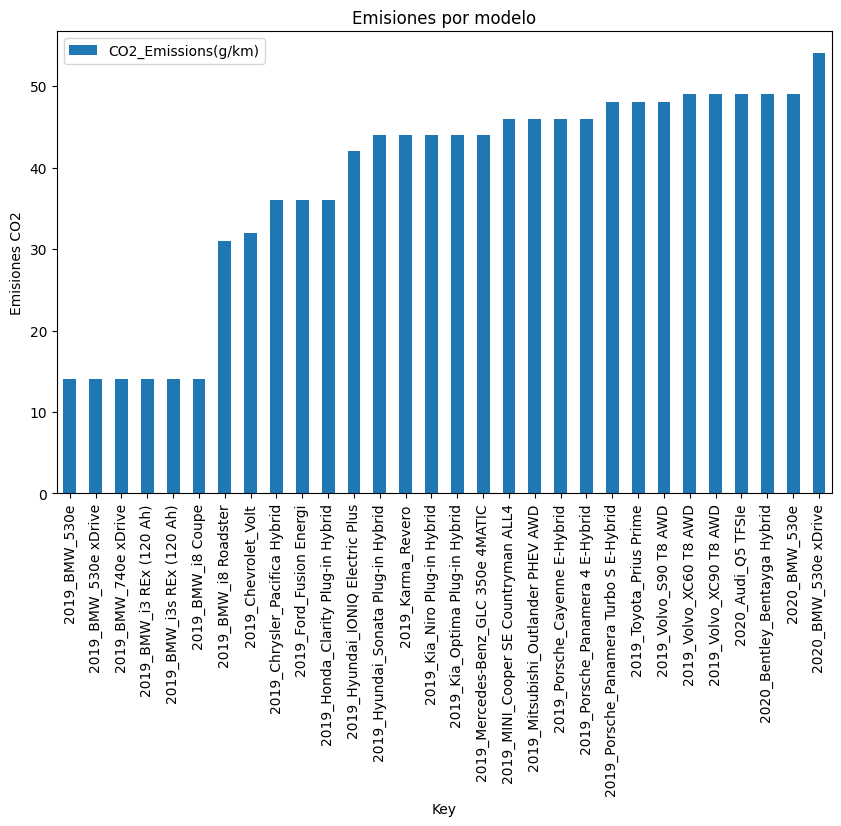

In [20]:
#Hago gráfico de barras

ax = modelos.set_index('Key').plot(kind='bar', stacked= True, figsize=(10,6))

ax.set_ylabel('Emisiones CO2')
ax.set_title('Emisiones por modelo')

plt.show()

Obtuvimos un listado de los modelos de vehículos que menos CO2 emiten por km.

2. Analisis multivariable => no ponerlo en el informe

In [21]:
multivar = merged_dataframe[['Fuel_type', 'Vehicle Class', 'Transmission', 'CO2_Emissions(g/km)']]
multivar.head()

,Fuel_type,Vehicle Class,Transmission,CO2_Emissions(g/km)
0,B,SUV: Standard,A1,0.0
1,B,Subcompact,A1,0.0
2,B,Subcompact,A1,0.0
3,B,Station wagon: Small,A1,0.0
4,B,Mid-size,A1,0.0


In [22]:
le = LabelEncoder()

In [23]:
multivar['Fuel_type'] = le.fit_transform(multivar['Fuel_type'].astype(str))
multivar['Vehicle Class'] = le.fit_transform(multivar['Vehicle Class'].astype(str))
multivar['Transmission'] = le.fit_transform(multivar['Transmission'].astype(str))

C:\Users\Windows\AppData\Local\Temp\ipykernel_10108\2149024796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multivar['Fuel_type'] = le.fit_transform(multivar['Fuel_type'].astype(str))
C:\Users\Windows\AppData\Local\Temp\ipykernel_10108\2149024796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multivar['Vehicle Class'] = le.fit_transform(multivar['Vehicle Class'].astype(str))
C:\Users\Windows\AppData\Local\Temp\ipykernel_10108\2149024796.py:3: SettingWithCopyWarning: 
A value is trying to be set 

d:\Documents\Documents\Data Science\Soy Henry\9- Proyectos\4- PF\Los berracos del dato - PF Taxi\NY_TaxiGreen\taxiGreen_venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


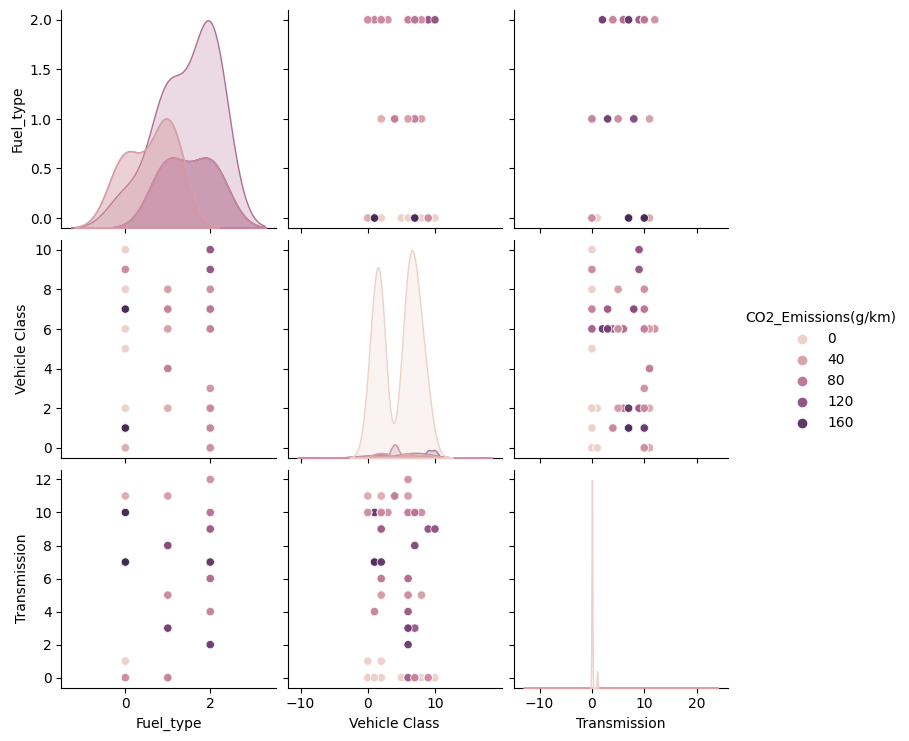

In [24]:
sns.pairplot(data=multivar, hue='CO2_Emissions(g/km)')

2. Emisiones por tipo de combustible

In [25]:
#Genero el DF
tipo_comb = merged_dataframe[['Fuel_type', 'CO2_Emissions(g/km)']]
tipo_comb.head()

,Fuel_type,CO2_Emissions(g/km)
0,B,0.0
1,B,0.0
2,B,0.0
3,B,0.0
4,B,0.0


In [26]:
#Agrupo por tipo de comb
tipo_comb = tipo_comb.groupby(['Fuel_type']).mean().reset_index()

In [27]:
#Ordeno de menor a mayor por co2TailpipeGpm
tipo_comb['CO2_Emissions(g/km)'] = sorted(tipo_comb['CO2_Emissions(g/km)'])
tipo_comb.head()

,Fuel_type,CO2_Emissions(g/km)
0,B,3.560224
1,B/X*,72.516129
2,B/Z*,114.588889


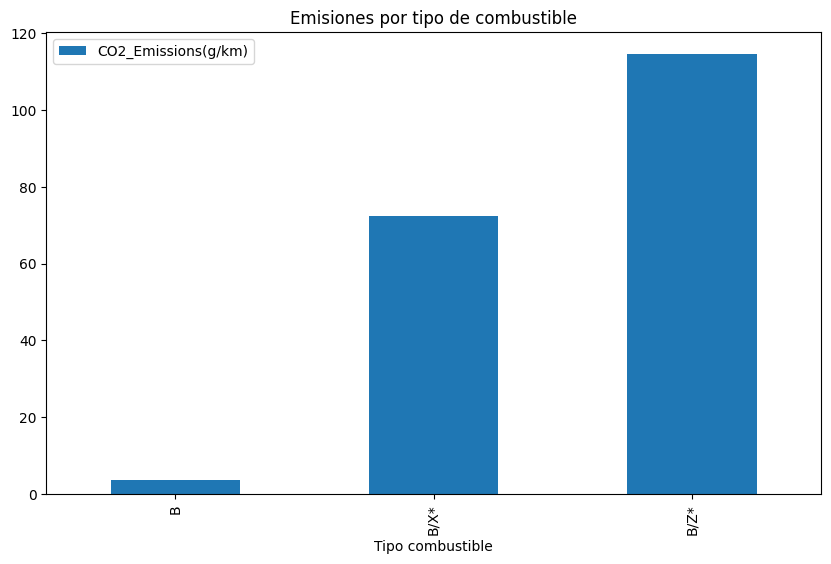

In [28]:
#Hago gráfico de barras

ax = tipo_comb.set_index('Fuel_type').plot(kind='bar', stacked= True, figsize=(10,6))

ax.set_xlabel('Tipo combustible')
ax.set_title('Emisiones por tipo de combustible')

plt.show()

En el dataset utilizado:
* B = electricidad
* X = gasolina regular
* Z = gasolina premium

Como era de esperar, los vehículos eléctricos son los que menos emiten, con valores de 0.

Hay que destacar que es notable la diferencia entre B/X (78 g/km) y B/Z (112 g/km). Quiere decir que el hibrido eléctrico/gasolina regular emite un 30% menos CO2 que el híbrido eléctrico/gasolina premiun.

3. Emisiones por Clase de vehículo

In [29]:
veh_class = merged_dataframe[['Vehicle Class', 'CO2_Emissions(g/km)']]

#Agrupo por clase de vehículo
veh_class = veh_class.groupby(['Vehicle Class']).mean().reset_index()

#Ordeno de menor a mayor por co2TailpipeGpm
veh_class['CO2_Emissions(g/km)'] = sorted(veh_class['CO2_Emissions(g/km)'])
veh_class

,Vehicle Class,CO2_Emissions(g/km)
0,Compact,0.000000
1,Full-size,14.755556
2,Mid-size,18.848485
3,Minicompact,27.283019
4,Minivan,32.888889
5,Pickup truck: Standard,36.324561
6,SUV: Small,39.638554
7,SUV: Standard,49.758621
8,Station wagon: Small,54.000000
9,Subcompact,59.000000


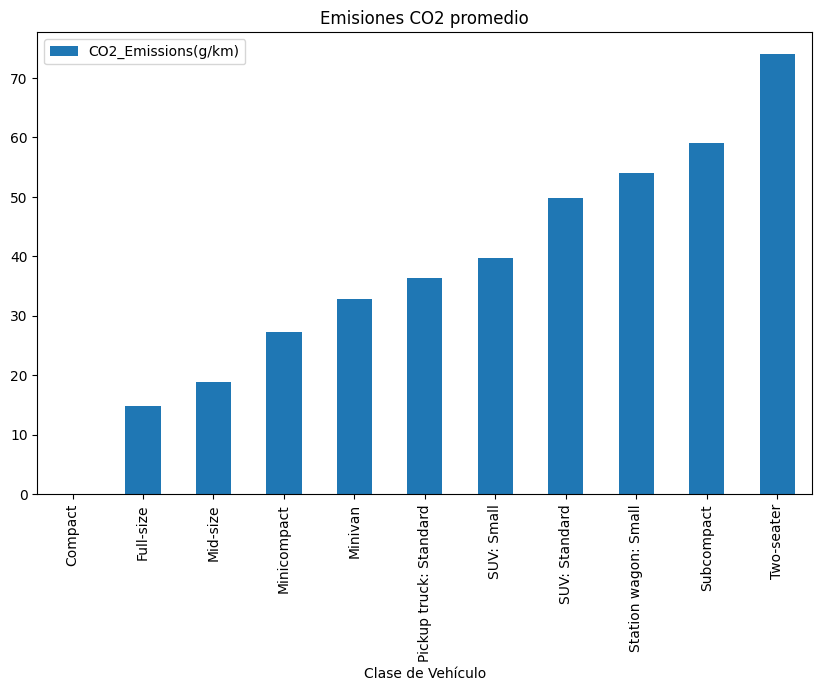

In [30]:
#Hago gráfico de barras

ax = veh_class.set_index('Vehicle Class').plot(kind='bar', stacked= True, figsize=(10,6))

ax.set_xlabel('Clase de Vehículo')
ax.set_title('Emisiones CO2 promedio')

plt.show()

El objetivo que nos habíamos puesto era 300 g/m (320 g/km) (en base al archivo Vehicle Fuel Economy Data.csv). Este objetivo lo pusimos teniendo en cuenta TODOS los vehículos del mercado, inclusive, lo que usan gasolina.

En este caso, sólo analizamos eléctrico e híbridos. Nuestra flota va a estar compuesta de eléctricos e híbrido. Por ende, tenemos que revisar el objetivo planteado originalmente.

(ESTO NO VA EN EL RESUMEN)

Si obviamos los eléctricos:

In [31]:
veh_class_2 = merged_dataframe[['Vehicle Class', 'CO2_Emissions(g/km)']]

#Elimino los que tienen emision 0 (eléctricos)
veh_class_2 = veh_class_2.loc[veh_class_2['CO2_Emissions(g/km)'] != 0.0]

#Agrupo por clase de vehículo
veh_class_2 = veh_class_2.groupby(['Vehicle Class']).mean().reset_index()

#Ordeno de menor a mayor por co2TailpipeGpm
veh_class_2['CO2_Emissions(g/km)'] = sorted(veh_class_2['CO2_Emissions(g/km)'])
veh_class_2

,Vehicle Class,CO2_Emissions(g/km)
0,Compact,47.846154
1,Full-size,54.000000
2,Mid-size,66.400000
3,Minicompact,74.000000
4,Minivan,80.333333
5,SUV: Small,90.021739
6,SUV: Standard,96.200000
7,Station wagon: Small,118.000000
8,Subcompact,131.600000
9,Two-seater,148.000000


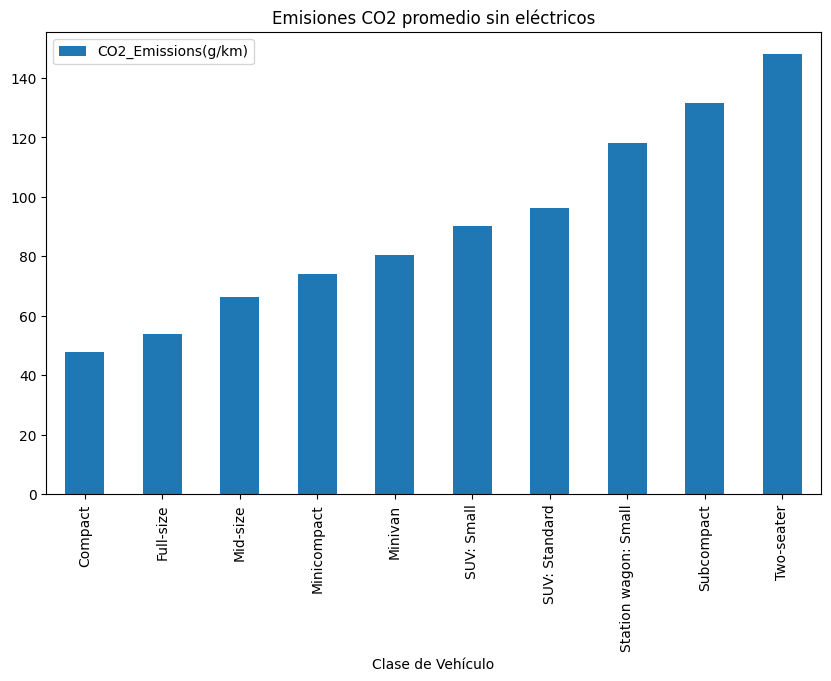

In [32]:
#Hago gráfico de barras

ax = veh_class_2.set_index('Vehicle Class').plot(kind='bar', stacked= True, figsize=(10,6))

ax.set_xlabel('Clase de Vehículo')
ax.set_title('Emisiones CO2 promedio sin eléctricos')

plt.show()

4. Autonomía por modelo

In [33]:
#Creo el DF
modelos_range = merged_dataframe[['Key', 'Range(km)']]

In [34]:
#Ordeno de menor a mayor por autonomía
modelos_range['Range(km)'] = sorted(modelos_range['Range(km)'], reverse=True)

modelos_range.head()

C:\Users\Windows\AppData\Local\Temp\ipykernel_10108\2343323351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelos_range['Range(km)'] = sorted(modelos_range['Range(km)'], reverse=True)


,Key,Range(km)
0,2019_Audi_e-tron 55 quattro,995.0
1,2019_BMW_i3 (120 Ah),995.0
2,2019_BMW_i3s (120 Ah),995.0
3,2019_Chevrolet_Bolt EV,995.0
4,2019_Hyundai_IONIQ Electric,962.0


In [35]:
modelos_range.describe()

,Range(km)
count,509.000000
mean,507.147348
std,180.260856
min,92.000000
25%,383.000000
50%,486.000000
75%,618.000000
max,995.000000


In [36]:
#Tomo los primero 30 valores
modelos_range = modelos_range.head(50)

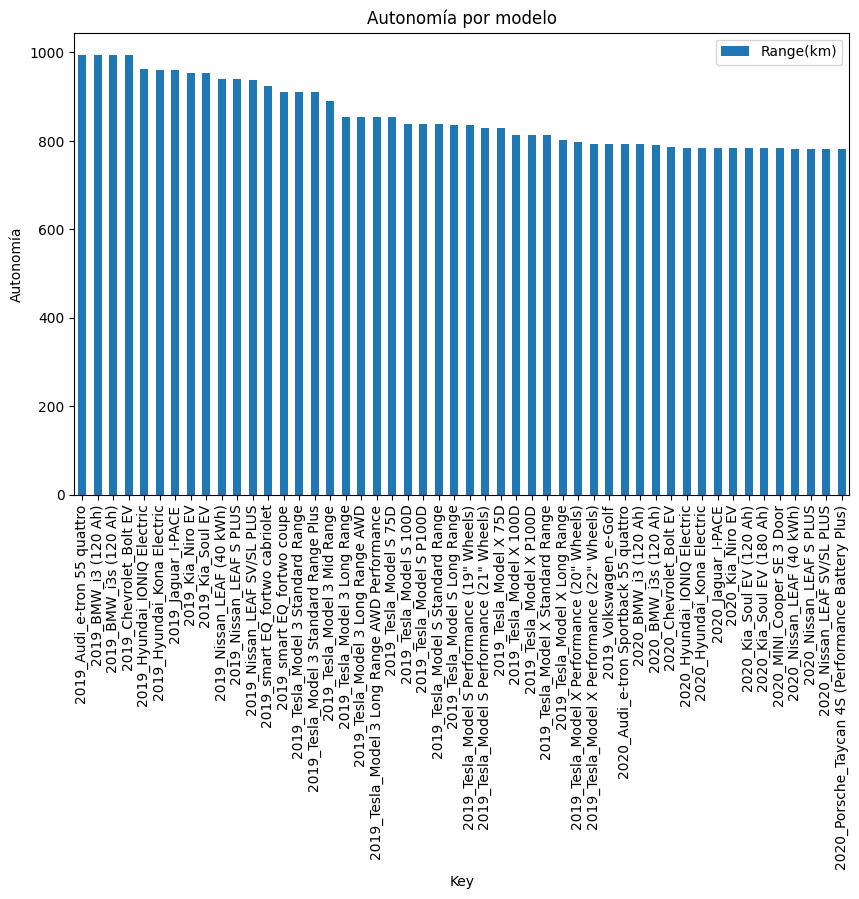

In [37]:
#Hago gráfico de barras

ax = modelos_range.set_index('Key').plot(kind='bar', stacked= True, figsize=(10,6))

ax.set_ylabel('Autonomía')
ax.set_title('Autonomía por modelo')

plt.show()

Obtuvimos un listado de los vehículos con mayor autonomía.

Si bien cuanto mayor autonomía tenga mejor, es necesario cruzar con otras variables, como precio y emisiones de CO2.

5. Autonomía por tipo de combustible

In [38]:
#Genero el DF
tipo_comb_range = merged_dataframe[['Fuel_type', 'Range(km)']]
tipo_comb_range.head()

#Agrupo por tipo de comb
tipo_comb_range = tipo_comb_range.groupby(['Fuel_type']).mean().reset_index()

#Ordeno de menor a mayor por co2TailpipeGpm
tipo_comb_range['Range(km)'] = sorted(tipo_comb_range['Range(km)'])
tipo_comb_range.head()

,Fuel_type,Range(km)
0,B,432.322129
1,B/X*,634.111111
2,B/Z*,753.693548


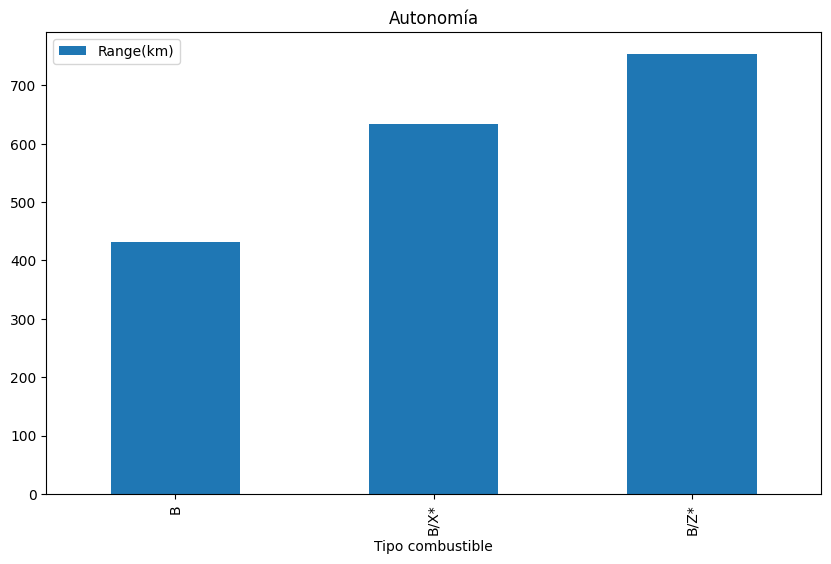

In [39]:
#Hago gráfico de barras

ax = tipo_comb_range.set_index('Fuel_type').plot(kind='bar', stacked= True, figsize=(10,6))

ax.set_xlabel('Tipo combustible')
ax.set_title('Autonomía')

plt.show()

En el dataset utilizado:
* B = electricidad
* X = gasolina regular
* Z = gasolina premium

Se observa que los vehículos eléctricos son los que menos autonomía tienen (en promedio). Y los vehículos con más autonomía son los Híbridos eléctrico/gasolina premiun (+80 % respecto al eléctrico).

Sin embargo, la autonomía promedio de los autos eléctricos está por encima de los 400 km, lo cual se situa dentro de la franja establecida como aceptable para nuestra flota (entre 300 y 500 km)

6. Autonomía por clase de vehículo

In [40]:
veh_class_range = merged_dataframe[['Vehicle Class', 'Range(km)']]

#Agrupo por clase de vehículo
veh_class_range = veh_class_range.groupby(['Vehicle Class']).mean().reset_index()

#Ordeno Range
veh_class_range['Range(km)'] = sorted(veh_class_range['Range(km)'])
veh_class_range

,Vehicle Class,Range(km)
0,Compact,290.250000
1,Full-size,304.212121
2,Mid-size,461.896552
3,Minicompact,478.422222
4,Minivan,493.941176
5,Pickup truck: Standard,499.537736
6,SUV: Small,520.289474
7,SUV: Standard,526.867470
8,Station wagon: Small,597.666667
9,Subcompact,671.000000


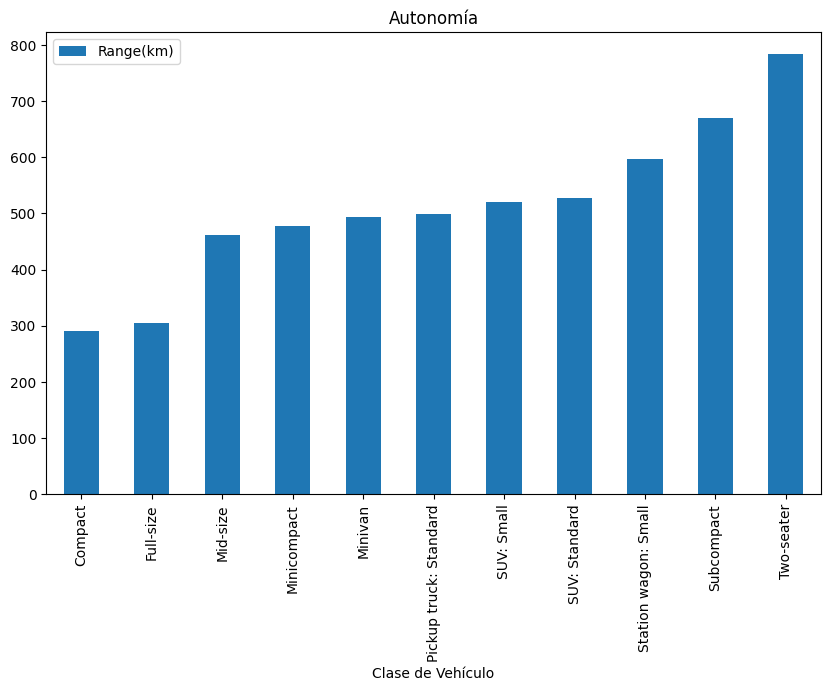

In [41]:
#Hago gráfico de barras

ax = veh_class_range.set_index('Vehicle Class').plot(kind='bar', stacked= True, figsize=(10,6))

ax.set_xlabel('Clase de Vehículo')
ax.set_title('Autonomía')

plt.show()

En cuanto a autonomía, podemos ver que los Full-size tienen un promedio (300km) al límite de nuestro rango aceptable de autonomía (de 300 a 500 km).

También es notorio que el promedio de autonomía en los mid-size (460 km) es perfecto para nuestro objetivo.

# **Conclusión general**

Recordando nuestros objetivos:
* Emisiones CO2 < 300 gpm (320 g/km)
* Autonomía: entre 300 y 500 km

Por las conclusiones parciales del analisis, podemos decir que:

En cuanto a emisiones:
* En primer lugar, debemos reformular el KPI puesto que el valor anterior los definimos basandonos en un dataset que contiene vehículos a gasolina. Luego definimos no tenerlos en cuenta en nuestro análisis por la tendencia en la ciudad y la exigencias gubernamentales.
* Los vehículos target para nuestra flota (Full-size y Mid-size) emiten, en promedio, menos de 20 g/km.
*Así mismo, también se observa que los modelos híbridos eléctrico/gasolina regular son mucho menos contaminantes que los modelos eléctricos/gasolina premiun.

En cuanto a autonomía:
* Los vehículos eléctricos cumplen, en promedio (400 km), con el rango propuesto de autonomía para nuestra flota.
* Si obrservamos las clases de vehículos, los Full-size están al límite del rango objetivo (300 km). Mientras que los Mid-size tienen un promedio (460km) perfecto para nuestro rango objetivo.

In [42]:
merged_dataframe.head()

,Key,Model_year,Make,Model,Vehicle Class,Motor,Transmission,Fuel_type,Consumption_comb(Le/100km),Range(km),CO2_Emissions(g/km)
0,2019_Audi_e-tron 55 quattro,2019,Audi,e-tron 55 quattro,SUV: Standard,300.0,A1,B,3.2,329.0,0.0
1,2019_BMW_i3 (120 Ah),2019,BMW,i3 (120 Ah),Subcompact,125.0,A1,B,2.1,246.0,0.0
2,2019_BMW_i3s (120 Ah),2019,BMW,i3s (120 Ah),Subcompact,135.0,A1,B,2.1,246.0,0.0
3,2019_Chevrolet_Bolt EV,2019,Chevrolet,Bolt EV,Station wagon: Small,150.0,A1,B,2.0,383.0,0.0
4,2019_Hyundai_IONIQ Electric,2019,Hyundai,IONIQ Electric,Mid-size,88.0,A1,B,1.7,200.0,0.0


In [55]:
merged_dataframe[merged_dataframe['Make'] == 'Nissan']

,Key,Model_year,Make,Model,Vehicle Class,Motor,Transmission,Fuel_type,Consumption_comb(Le/100km),Range(km),CO2_Emissions(g/km)
9,2019_Nissan_LEAF (40 kWh),2019,Nissan,LEAF (40 kWh),Mid-size,110.0,A1,B,2.1,243.0,0.0
10,2019_Nissan_LEAF S PLUS,2019,Nissan,LEAF S PLUS,Mid-size,160.0,A1,B,2.2,363.0,0.0
11,2019_Nissan_LEAF SV/SL PLUS,2019,Nissan,LEAF SV/SL PLUS,Mid-size,160.0,A1,B,2.2,349.0,0.0
46,2020_Nissan_LEAF (40 kWh),2020,Nissan,LEAF (40 kWh),Mid-size,110.0,A1,B,2.1,240.0,0.0
47,2020_Nissan_LEAF S PLUS,2020,Nissan,LEAF S PLUS,Mid-size,160.0,A1,B,2.2,363.0,0.0
48,2020_Nissan_LEAF SV/SL PLUS,2020,Nissan,LEAF SV/SL PLUS,Mid-size,160.0,A1,B,2.2,349.0,0.0
92,2021_Nissan_LEAF (40 kWh),2021,Nissan,LEAF (40 kWh),Mid-size,110.0,A1,B,2.1,240.0,0.0
93,2021_Nissan_LEAF S PLUS,2021,Nissan,LEAF S PLUS,Mid-size,160.0,A1,B,2.2,363.0,0.0
94,2021_Nissan_LEAF SV/SL PLUS,2021,Nissan,LEAF SV/SL PLUS,Mid-size,160.0,A1,B,2.2,349.0,0.0
172,2022_Nissan_LEAF (40 kWh),2022,Nissan,LEAF (40 kWh),Mid-size,110.0,A1,B,2.1,240.0,0.0
